### Code to generate the Figure that compares conventional macroscope with COSMOS

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
# %pdb

import os
from IPython.core.debugger import set_trace

from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np
import time
import scipy.stats

import h5py
from scipy.ndimage.filters import gaussian_filter1d


import cosmos.traces.trace_analysis_utils as utils
from cosmos.behavior.bpod_dataset import BpodDataset
import cosmos.imaging.atlas_registration as reg
from cosmos.traces.cell_plotter import CellPlotter
from cosmos.traces.cosmos_traces import CosmosTraces

import cosmos.params.trace_analyze_params as params ### All variables here should be capitalized.

import matplotlib
matplotlib.rcParams.update({'xtick.major.pad': '2'})
matplotlib.rcParams.update({'ytick.major.pad': '2'})
matplotlib.rcParams.update({'font.size': 8})
matplotlib.rcParams['pdf.fonttype'] = 42 # truetype
matplotlib.rcParams['ps.fonttype'] = 42

/home/deisseroth/venv2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Select dataset.
#data_dir = '/home/izkula/Data/processedData/'
data_dir = '/home/izkula/Dropbox/cosmos_data/'
# fig_save_dir = '/home/izkula/Dropbox/cosmos/trace_analysis/macroscope_comparison'
fig_save_dir = '/home/izkula/Dropbox/cosmos/fig_plots/fig2'
bpod_dir = '/home/izkula/Dropbox/cosmos_data/behavior/'

data_dir = '/home/deisseroth/Dropbox/Projects/cosmos_data/'
fig_save_dir = '/home/deisseroth/Dropbox/cosmos/fig_plots/fig2'
bpod_dir = '/home/deisseroth/Dropbox/cosmos/behavior/'

datasets = [
   {'date': '20180424', 'name': 'cux2ai148m945_cosmos_1'},
  {'date': '20180424', 'name': 'cux2ai148m945_cosmos_2'},
   {'date': '20180424', 'name': 'cux2ai148m945_cosmos_3'},
   {'date': '20180424', 'name': 'cux2ai148m945_f1.2_1'},
    {'date': '20180424', 'name': 'cux2ai148m945_f1.2_4'},
   {'date': '20180424', 'name': 'cux2ai148m945_f1.2_3'},
   {'date': '20180424', 'name': 'cux2ai148m945_f2_1'},
   {'date': '20180424', 'name': 'cux2ai148m945_f2_2'},
   {'date': '20180424', 'name': 'cux2ai148m945_f2_3'},
   {'date': '20180424', 'name': 'cux2ai148m945_f2.8_1'},
   {'date': '20180424', 'name': 'cux2ai148m945_f2.8_2'},
   {'date': '20180424', 'name': 'cux2ai148m945_f2.8_3'},
   {'date': '20180424', 'name': 'cux2ai148m945_f4_1'},
   {'date': '20180424', 'name': 'cux2ai148m945_f4_2'},
   {'date': '20180424', 'name': 'cux2ai148m945_f4_3'},
   {'date': '20180424', 'name': 'cux2ai148m945_f5.6_1'},
   {'date': '20180424', 'name': 'cux2ai148m945_f5.6_2'},
   {'date': '20180424', 'name': 'cux2ai148m945_f5.6_3'},
   {'date': '20180424', 'name': 'cux2ai148m945_f8_1'},
   {'date': '20180424', 'name': 'cux2ai148m945_f8_2'},
   {'date': '20180424', 'name': 'cux2ai148m945_f8_3'},
]


In [3]:
%pdb

Automatic pdb calling has been turned ON


In [4]:
# Load data.
startt = time.time()
allCT = []
for dataset_id in range(len(datasets)):
    dataset = datasets[dataset_id]
    print(dataset)
    dataset['data_root'] = data_dir
    dataset['fig_save_dir'] = fig_save_dir
    dataset['behavior_dir'] = bpod_dir
    CT = CosmosTraces(dataset, do_reshape_to_traces=False)
    allCT.append(CT)
print('Elapsed time: '+str(time.time() - startt))

{'date': '20180424', 'name': 'cux2ai148m945_cosmos_1'}
(1/3) Loading trace data.
Bpod file not loaded: hardcoding dt.
LED trials: 25
Processing traces.
[-46.70718045 500.70718045]
[307.54272497 366.45727503]
Elapsed time: 14.770386695861816


In [5]:
groups = ['cosmos', 'f1.2', 'f2', 'f2.8', 'f4', 'f5.6', 'f8']
ncells = {}
for ind, CT in enumerate(allCT):
    name = datasets[ind]['name']
    group = name.split('_')[1]
    if group in ncells.keys():
        ncells[group].append(CT.ncells)
    else:
        ncells[group] = [CT.ncells]
        
ncells_array = np.zeros((len(groups), np.round(len(datasets)/len(groups)).astype('int')))
for ind, group in enumerate(groups):
    ncells_array[ind,:] = ncells[group]

KeyError: 'f1.2'

> <ipython-input-5-285cd7064618>(13)<module>()
      9         ncells[group] = [CT.ncells]
     10 
     11 ncells_array = np.zeros((len(groups), np.round(len(datasets)/len(groups)).astype('int')))
     12 for ind, group in enumerate(groups):
---> 13     ncells_array[ind,:] = ncells[group]

ipdb> 
ipdb> q


In [ ]:
# TODO:
# Import 4th one?
# Recheck the f1.2_2

/home/deisseroth/venv2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/deisseroth/venv2/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/deisseroth/venv2/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/deisseroth/venv2/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/deisseroth/venv2/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: zero-size array to reduction operation maximum which has no identity

> /home/deisseroth/venv2/lib/python3.6/site-packages/numpy/core/_methods.py(26)_amax()
     24 # small reductions
     25 def _amax(a, axis=None, out=None, keepdims=False):
---> 26     return umr_maximum(a, axis, None, out, keepdims)
     27 
     28 def _amin(a, axis=None, out=None, keepdims=False):

ipdb> q


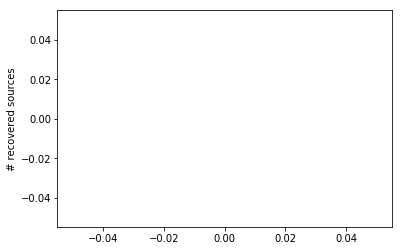

In [6]:
# Compare number of recovered neurons.
a = ncells_array
ndesigns = np.shape(a)[0]
x=np.arange(ndesigns)
labels = ['COSMOS', 'f/1.2', 'f/2', 'f/2.8', 'f/4', 'f/5.6', 'f/8']
plt.bar(np.arange(ndesigns), np.mean(a, axis=1), color=plt.cm.hsv(np.linspace(0, 1, len(labels))))
plt.errorbar(x, np.mean(a, axis=1), 
             yerr=scipy.stats.sem(a, axis=1), linestyle='None', 
             color='k', marker='.')
plt.ylabel('# recovered sources')
plt.ylim([0, np.max(a)+200])
plt.xticks(x, labels, rotation=45)

import scikit_posthocs as sp
h, p = scipy.stats.kruskal(a[0,:], a[1,:], a[2,:], a[3,:], a[4,:], a[5,:], a[6,:])
d = sp.posthoc_ttest(a, p_adjust='fdr_bh')
signif = np.logical_and.reduce(((d<0.05, d>-1)))
COSMOS_signif = signif[0,1:]
plt.title(COSMOS_signif)
if not os.path.isdir(fig_save_dir):
    os.makedirs(fig_save_dir)
plt.savefig(os.path.join(fig_save_dir, 'num_sources_' + '.svg'),
                    bbox_inches='tight')

In [ ]:
%pdb

cux2ai148m945_cosmos_1
False
Saving to /home/deisseroth/Dropbox/cosmos/fig_plots/fig2/20180424/cux2ai148m945_cosmos_1/contours_.pdf
---Plotting contours: 20.127074003219604 seconds ---


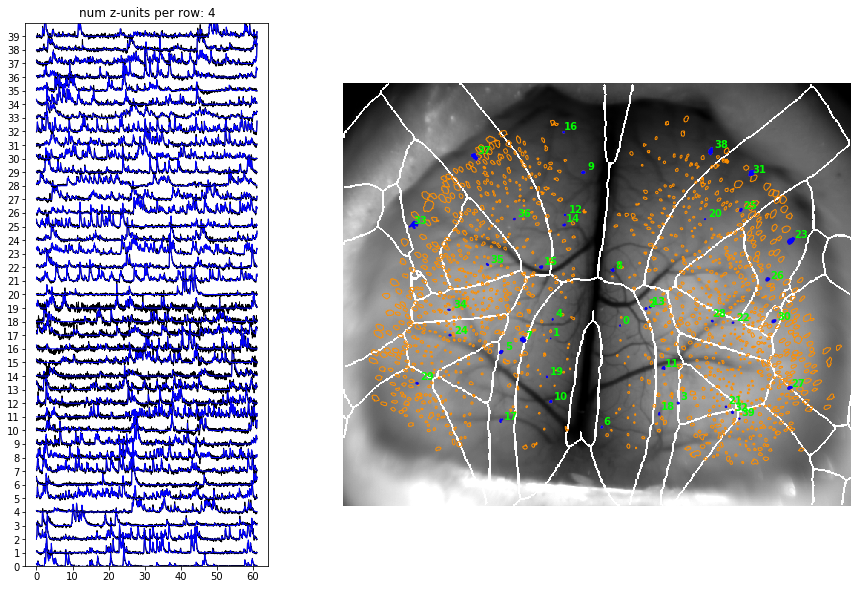

In [7]:
# Plot contours. 

do_show_outline = True

for ind, CT in enumerate(allCT[:]):
    name = datasets[ind]['name']
    print(name)
    
    fig = plt.figure(figsize=(20, 10))
    CP = CellPlotter(CT.C, CT.F, CT.footprints,
                     CT.mean_image, spikes=None,
                     errbar=None,
                     date='20180424',
                     name=name,
                     fig_save_path=fig_save_dir, #### FILL THIS IN
                     suffix='.pdf',
                     cmap=None)

    hn = np.round(np.linspace(0, 400, 47)).astype('int')
    hn = np.hstack((hn[:20], hn[27:]))
#     CP.set_highlighted_neurons(np.round(np.linspace(0, 400, 50)).astype('int'))
#     CP.set_highlighted_neurons(np.round(np.hstack((np.linspace(0, 150, 20), np.linspace(250, 400, 20)))).astype('int'))
    CP.set_highlighted_neurons(hn)

    CP.plot_traces(n_timepoints=CT.C.shape[1],
                   ax=plt.subplot(142),
                   # Even though only two plots, using subplot(142)
                   # squeezes the trace plot to improve aesthetics.
                   save_plot=False, \
                   event_frames=None, \
                   dt=CT.dt)

    if do_show_outline:
        atlas_outline = CT.atlas_outline
    else:
        atlas_outline = None
#     if (footprints is not None and mean_image is not None and
#             atlas_outline is not None):
    CP.plot_contours(highlight_neurons=True,
                     display_numbers=True,
                     ax=plt.subplot(122),
                     atlas_outline=atlas_outline,
                     maxthr=0.8,
                     just_show_highlighted=False,
                     highlight_color=[0, 0, 1, 1],
                     edge_color=np.array((1, 0.56, 0, 1)),
                     no_borders=True)


In [ ]:
np.round(np.hstack((np.linspace(0, 150, 25), np.linspace(250, 400, 25))))

In [ ]:
145/255

In [8]:
def get_noise_fft(trace):
    range_ff = np.array([0.2500, 0.5000])
    N = trace.shape[0]
    Fs = 1;
    ff = np.linspace(0, Fs/2, N/2)
    xdft = np.fft.fft(trace);
    xdft = xdft[1:np.floor(N/2).astype('int')+1];
    psdx = (1/(Fs*N)) * np.abs(xdft)**2;
    psdx[2:-1] = 2*psdx[2:-1];
    indf=ff>range_ff[0];
    indf[np.where(ff>range_ff[1])[0]]=0;
    sn = np.sqrt(np.exp(np.mean(np.log(psdx[indf]/2))));
    return sn

In [9]:
# Compute SNR for top traces from each video. 
allPNR = []
nneurons = 100
for ind, CT in enumerate(allCT):
    print(ind)
    sn = []
    peak = []
    for nn in range(CT.F.shape[0]):
        trace = CT.F[nn, :]
        sn.append(get_noise_fft(trace))
        peak.append(np.percentile(trace, 99.9))
    PNR = np.array(peak)/np.array(sn)
    sort_inds = np.argsort(-PNR)
    sorted_PNR = PNR[sort_inds]
    allPNR.append(sorted_PNR[0:nneurons])

0


/home/deisseroth/venv2/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


In [10]:
# Plot SNR.
groups = ['cosmos', 'f1.2', 'f2', 'f2.8', 'f4', 'f5.6', 'f8']
groupPNR = {}
for ind, CT in enumerate(allCT):
    name = datasets[ind]['name']
    group = name.split('_')[1]
    if group in groupPNR.keys():
        groupPNR[group].append(allPNR[ind])
    else:
        groupPNR[group] = [allPNR[ind]]
        
groupPNR_list = []
for ind, group in enumerate(groups):
#     groupPNR_list.append(np.array(groupPNR[group]))
    groupPNR_list.append(np.hstack(groupPNR[group]))
plt.boxplot(groupPNR_list)    
plt.ylabel('PSNR')
plt.xticks(range(1, len(labels)+1), groups, rotation=0)
if not os.path.isdir(fig_save_dir):
    os.makedirs(fig_save_dir)
    
import scikit_posthocs as sp
a = groupPNR_list
h, p = scipy.stats.kruskal(a[0], a[1], a[2], a[3], a[4], a[5], a[6])
d = sp.posthoc_ttest(a, p_adjust='fdr_bh')
signif = np.logical_and.reduce(((d<0.05, d>-1)))
COSMOS_signif = signif[0,1:]
plt.title(COSMOS_signif)

# plt.savefig(os.path.join(fig_save_dir, 'psnr_' + str(nneurons) + '_.svg'),
#                     bbox_inches='tight')

KeyError: 'f1.2'

> <ipython-input-10-1be6691341a5>(15)<module>()
     13 for ind, group in enumerate(groups):
     14 #     groupPNR_list.append(np.array(groupPNR[group]))
---> 15     groupPNR_list.append(np.hstack(groupPNR[group]))
     16 plt.boxplot(groupPNR_list)
     17 plt.ylabel('PSNR')

ipdb> q


In [ ]:
# Plot example traces

In [11]:
 for kk = 1:numel(allNeuronStructs)
        d = data{kk};
        neuron = allNeuronStructs{kk};


        A = neuron.A; %%% #pixels x #neurons
        C_raw = neuron.C_raw; %%%% #neurons x #timepoints
        C = neuron.C;
        numNeurons = size(A, 2);

        labels{kk} = d{5}

        sn = [];
        peak = [];
        for nn = 1:numNeurons
            trace = C_raw(nn, :);
    %         if nn == 2 %%% Plot an example trace
    %             figure, plot(trace), title(labels{kk})
    %         end
            sn(nn) = get_noise_fft(trace);
            peak(nn) = quantile(trace, .999);
        end

        PNR = peak./sn;
        [sPNR, sinds] = sort(PNR, 'descend');


        numN = min(topN, size(sPNR, 2));
        topPNR(kk, 1:numN) = sPNR(1:numN);

        figure
        plotStackedTraces(C_raw(sinds(1:numN),:), [.4,.4,.4], dt)
        hold on
        plotStackedTraces(C(sinds(1:numN),:),  'r', dt)   
        title(labels{kk})    
        export_fig(fullfile(saveDir, 'plots', ['traces_', num2str(kk), '.pdf']))

    end

    figure, boxplot(topPNR')
    set(gca,'xticklabel',labels)
    title(['PNR of top ', num2str(topN), ' neurons'], 'FontSize', fsize)
    set(gca,'FontSize',fsize);
    set(gca, 'XTickLabelRotation', 45)
    export_fig(fullfile(saveDir, ['PNR_of_top_neurons.pdf']))
    
    
    
    margin = 0.1;
    nPerGroup = 3;
    groupedPNR = nan*ones(numel(allNeuronStructs)/nPerGroup, topN*nPerGroup);
    figure('Position', [100, 100, 400, 400])
    for i = 1:numel(groups)
            g = groups(i)
            
            rows = find(group == g & depth == 1); 
            pnr = topPNR(rows,:);
            groupedPNR(i*2, :) = pnr(:);
            plot(i*ones(size(pnr))+margin, pnr, 'g.', 'MarkerSize', 15)
            hold on
            plot(i + margin, nanmedian(pnr(:)), 'k+')
            
            rows = find(group == g & depth == 0); 
            pnr = topPNR(rows,:);
            groupedPNR(i*2-1, :) = pnr(:);
            plot(i*ones(size(pnr))- margin, pnr, 'c.', 'MarkerSize', 15)
            plot(i-margin, nanmedian(pnr(:)), 'k+')
            
            %%% Just extract the shortened group name for plot labels
            ind = find(group == g)
            labelFull = labels{ind(1)};
            labelShort = strsplit(labelFull, '-');
            groupLabels{i} = labelShort{1};
    end
    xticks([1:numel(groups)])
    set(gca,'xticklabel',groupLabels, 'FontSize', 12)
    title('PSNR of top neurons', 'FontSize', 12)
    export_fig(fullfile(saveDir, ['grouped_PNR_of_top_neurons.pdf']))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)